In [5]:
rm(list=ls())
dset <- read.csv('~/JAPE/ConcurrentData/ResponseAnalysis/responses_p054.csv')
head(dset,3)
dim(dset)

,lever,time,irt_local,irt_global,reinforced,session,bird,cum_resp_left,cum_resp_right,cum_reinf_left,cum_reinf_right,first_in_visit,last_in_visit,local_VI,alter_VI
,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<lgl>,<lgl>,<dbl>,<dbl>
1,right,334.76,0.00,0.00,TRUE,s01,p054,0,1,0,1,TRUE,FALSE,90,30
2,right,344.65,9.89,9.89,FALSE,s01,p054,0,2,0,1,FALSE,FALSE,90,30
3,right,346.98,2.33,2.33,FALSE,s01,p054,0,3,0,1,FALSE,FALSE,90,30


[1] 397532     15

In [272]:
sess <- subset(dset,session=='s03')
dim(sess)

[1] 1749   15

In [16]:
choices <- as.numeric(sess$lever=='right')
rewards <- as.numeric(sess$reinforced)

In [19]:
r_R <- cumsum(choices==1&rewards==1)
r_L <- cumsum(choices==0&rewards==1)
c_R <- cumsum(choices==1)
c_L <- cumsum(choices==0)
head(data.frame(choices,rewards,r_R,r_L,c_R,c_L),10)

,choices,rewards,r_R,r_L,c_R,c_L
,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,0,0,0,0,0,1
2,0,0,0,0,0,2
3,1,1,1,0,1,2
4,0,0,1,0,1,3
5,0,0,1,0,1,4
6,0,0,1,0,1,5
7,1,0,1,0,2,5
8,1,0,1,0,3,5
9,0,0,1,0,3,6


In [231]:
cum_record <- function(bin_seq,
                       add=F,
                       min_lim=NULL,
                       max_lim=NULL,
                       col='black',
                       lwd=1){
    # bin_seq is a sequence of 0s and 1s
    cum_0 <- cumsum(bin_seq==0)
    cum_1 <- cumsum(bin_seq==1)
    if(!add){
        if(is.null(max_lim)){max_lim <- max(max(cum_0),max(cum_1))}
        if(is.null(min_lim)){min_lim <- 0}
        plot(NULL,xlim=c(min_lim,max_lim),ylim=c(min_lim,max_lim))
        abline(0,1,lty='dotted')
    }
    lines(cum_1,cum_0,col=col,lwd=lwd)
    return(list(cum_0=cum_0,cum_1=cum_1))
}

In [262]:
alpha <- -0.01
beta <- 0.01
gamma <- -0.15
linear <- alpha*(r_R-r_L)+beta*(c_R-c_L)+gamma
prob_R <- 1/(1+exp(-(linear)))
model_choice <- as.numeric(prob_R>0.5)
model_choice

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1037] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1074] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1111] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1148] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1185] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1222] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1259] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1296] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1370] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1407] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1444] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1481] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1518] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1555] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1592] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1629] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1666] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1703] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1740] 0 0 0 0 0 0 0 0 0 0

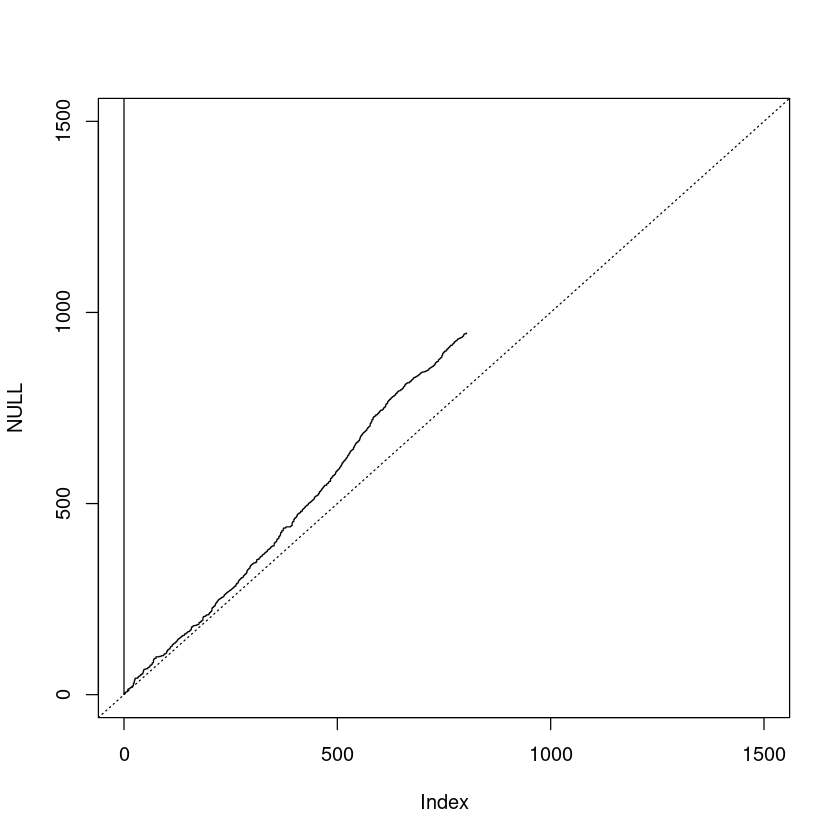

In [263]:
options(repr.plot.width=7)
cum_record(model_choice,min_lim=0,max_lim=1500)->as
cum_record(choices,add=T)->cr
#points(cr$cum_1[rewards==1],cr$cum_0[rewards==1],pch=4)

In [218]:
length(rewards)

[1] 1749

In [312]:

infer_model_1 <- function(bird,sess){

dts_bird <- read.csv(paste('~/JAPE/ConcurrentData/ResponseAnalysis/responses_',bird,'.csv',sep=''))
dts_session <- subset(dts_bird,session==sess)

choices <- as.numeric(dts_session$lever=='right')
rewards <- as.numeric(dts_session$reinforced)
r_R <- cumsum(choices==1&rewards==1)
r_L <- cumsum(choices==0&rewards==1)
c_R <- cumsum(choices==1)
c_L <- cumsum(choices==0)
n_trials <- length(c_L)
observed <- list('choices','r_R','r_L','c_R','c_L','n_trials')
unobs <- c('alpha_prior','beta_prior','gamma_prior',
           'alpha_post','beta_post','gamma_post',
           'choices_post')
write('
model{
        
alpha_post~dnorm(0,1)
beta_post~dnorm(0,1)
gamma_post~dnorm(0,1)

    for(i in 1:n_trials){
        linear_post[i] <- alpha_post*(r_R[i]-r_L[i])+beta_post*(c_R[i]-c_L[i])+gamma_post
        theta_post[i] <- 1/(1+exp(-linear_post[i]))
        choices[i]~dbern(theta_post[i])
        choices_post[i]~dbern(theta_post[i])
    }

}
','model1.bug')
library('R2jags')
bayes <- jags.parallel(data = observed,
             parameters.to.save = unobs,
             model.file = 'model1.bug',
             n.chains=4,
             n.iter=5000,
             n.burnin=2000,
             n.thin=3)
unlink('model1.bug')
summary(bayes$BUGSoutput$summary)
nds <- bayes$BUGSoutput$sims.list
    return(list(bird=bird,session=sess,choices=choices,rewards=rewards,nds=nds))
}

In [313]:
m1_p004_s59 <- infer_model_1(bird = 'p004',sess = 's59')

In [314]:
m1_p054_s12 <- infer_model_1(bird = 'p054',sess = 's12')

In [315]:
m1_p510_s15 <- infer_model_1(bird = 'p510',sess = 's15')

In [316]:
m1_p510_s16 <- infer_model_1(bird = 'p510',sess = 's16')

In [317]:
m1_p510_s152 <- infer_model_1(bird = 'p510',sess = 's152')

In [318]:
m1_p530_s119 <- infer_model_1(bird = 'p530',sess = 's119')

In [319]:
m1_p530_s144 <- infer_model_1(bird = 'p530',sess = 's144')

In [329]:
save(m1_p004_s59,file='~/JAPE/Modeling/m1_p004_s59_LauGlimcher.RData')
save(m1_p054_s12,file='~/JAPE/Modeling/m1_p054_s12_LauGlimcher.RData')
save(m1_p510_s15,file='~/JAPE/Modeling/m1_p510_s15_LauGlimcher.RData')
save(m1_p510_s16,file='~/JAPE/Modeling/m1_p510_s16_LauGlimcher.RData')
save(m1_p510_s152,file='~/JAPE/Modeling/m1_p510_s152_LauGlimcher.RData')
save(m1_p530_s119,file='~/JAPE/Modeling/m1_p530_s119_LauGlimcher.RData')
save(m1_p530_s144,file='~/JAPE/Modeling/m1_p530_s144_LauGlimcher.RData')

In [325]:
plot_model <- function(m_list){
    layout(cbind(matrix(1,nrow=2,ncol=2),
             matrix(2:5,ncol=2)))

    # Posterior Predictive
    for(i in (1:dim(m_list$nds$choices_post)[1])[1:100]){
        cum_record(m_list$nds$choices_post[i,],add=(i!=1),col='blue')->cr
    }
    cum_record(_list$choices,col='black',lwd=3,add=T)->as

    # 
    hist(m_list$nds$alpha_post,breaks=50)
    hist(m_list$nds$beta_post,breaks=50)
    hist(m_list$nds$gamma_post,breaks=50)
    plot(m_list$nds$alpha_post,m_list$nds$beta_post)
}

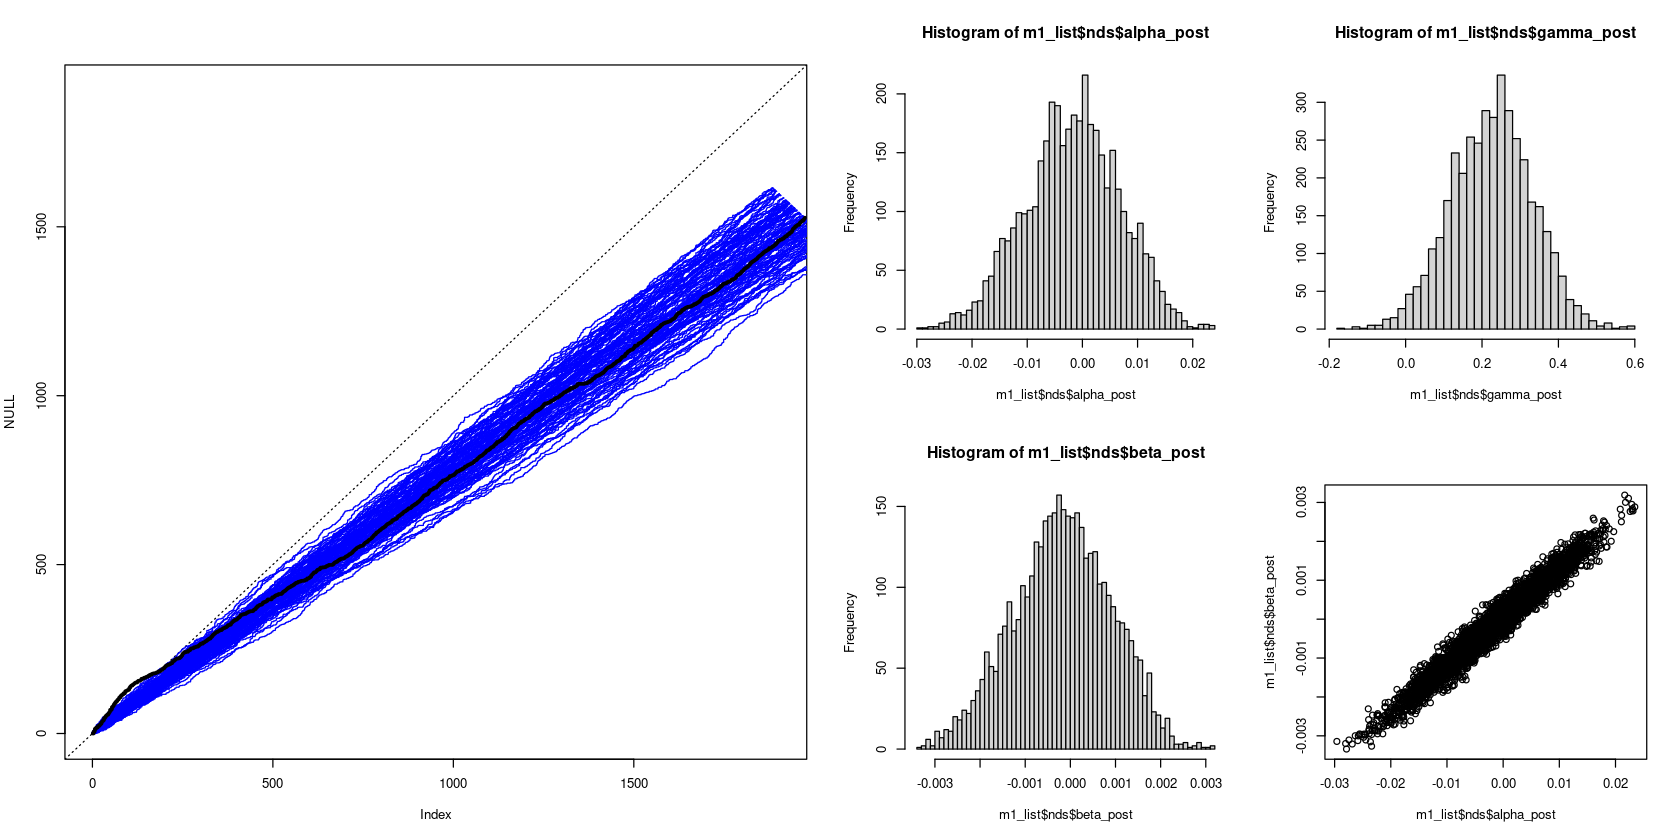

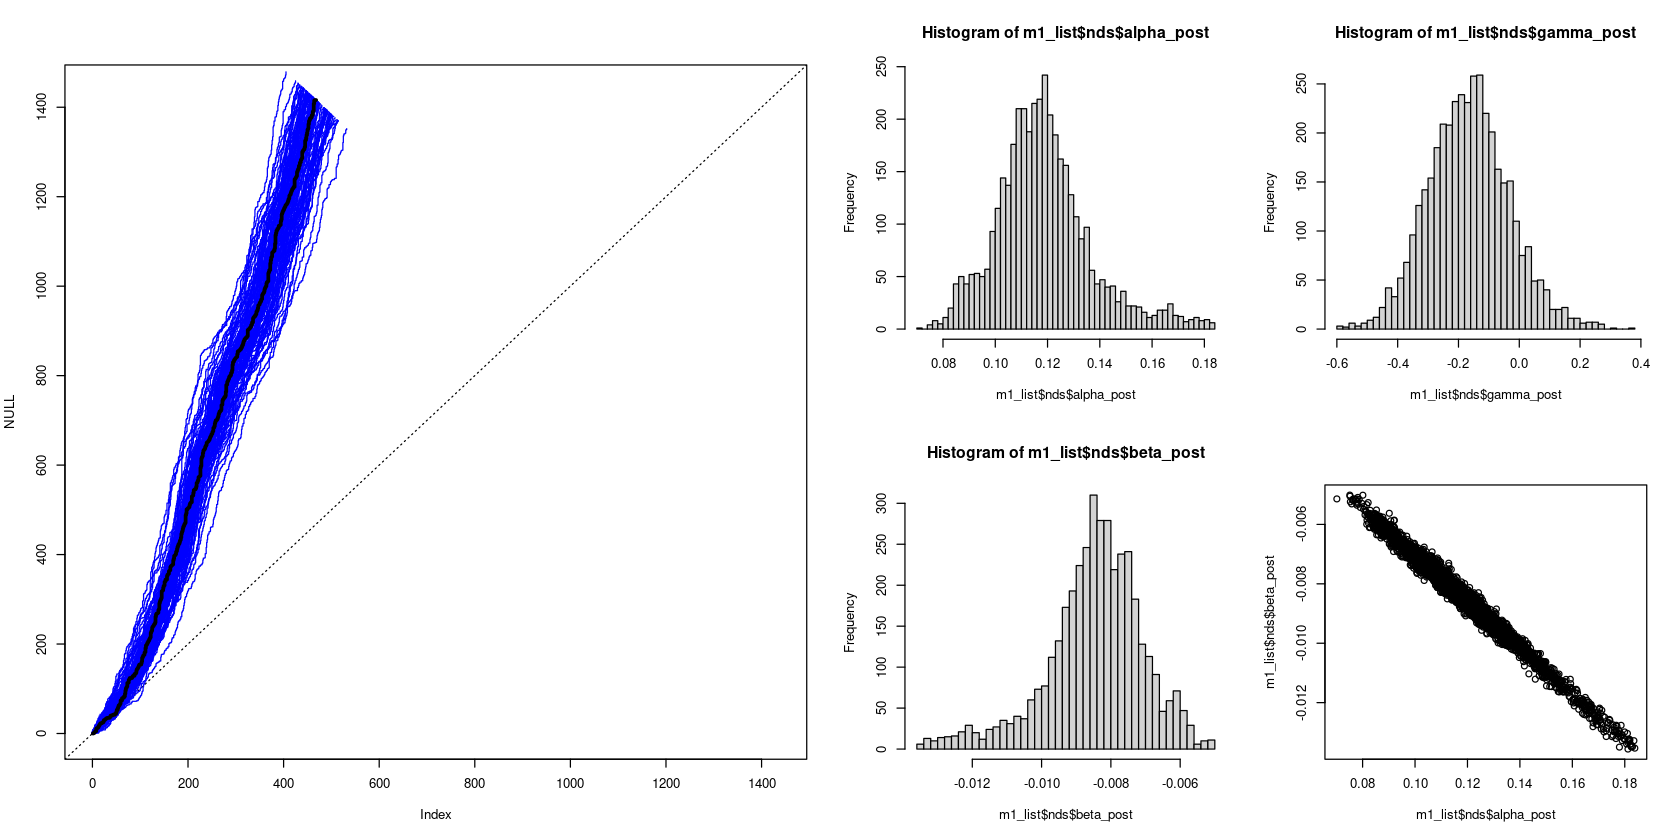

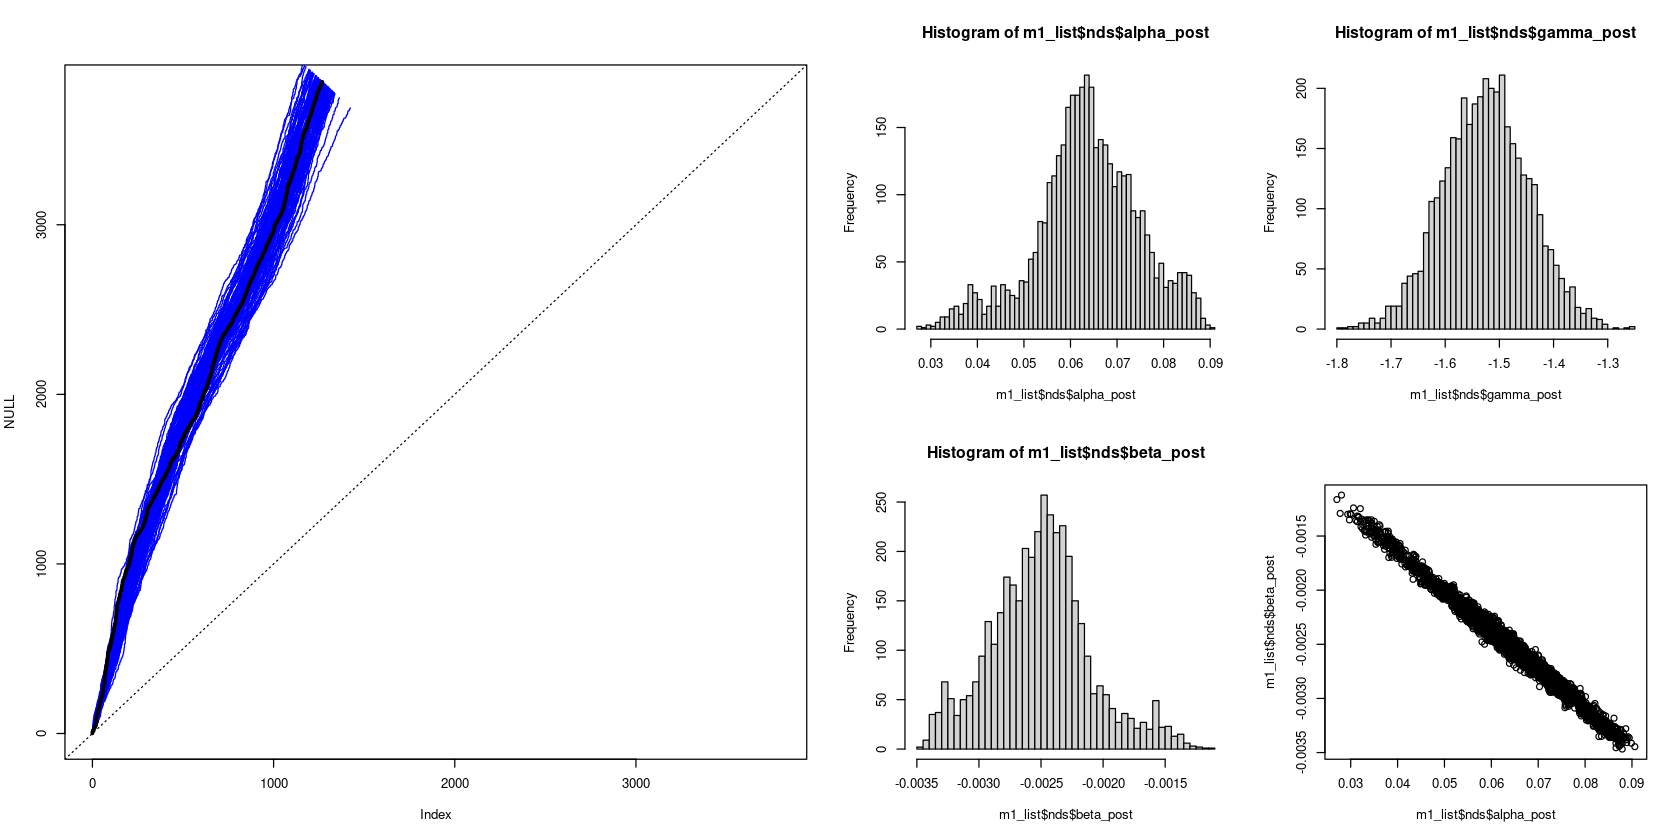

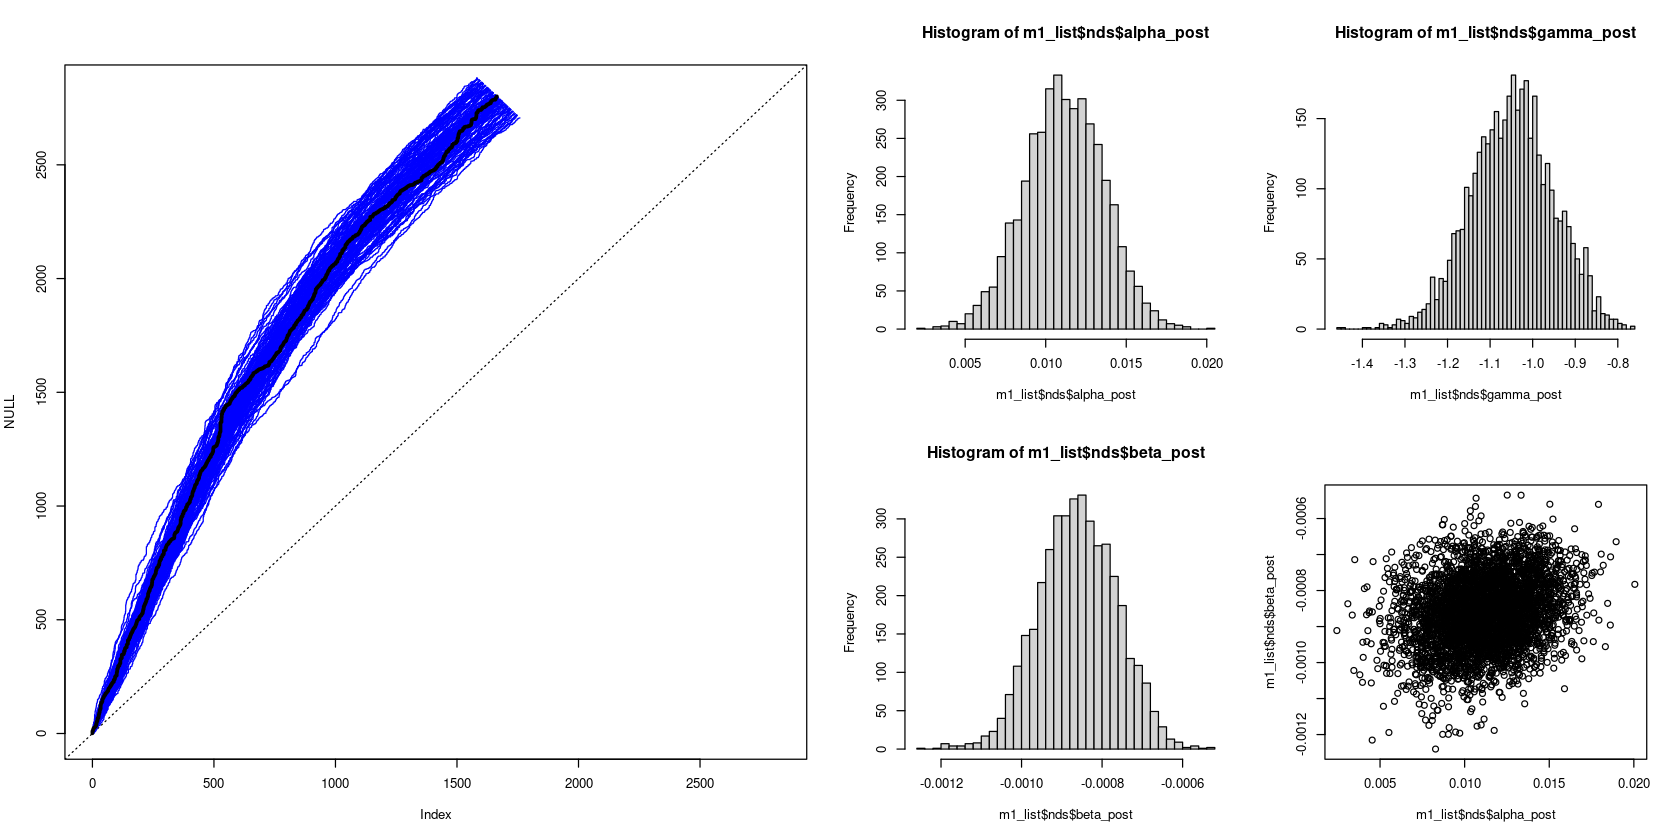

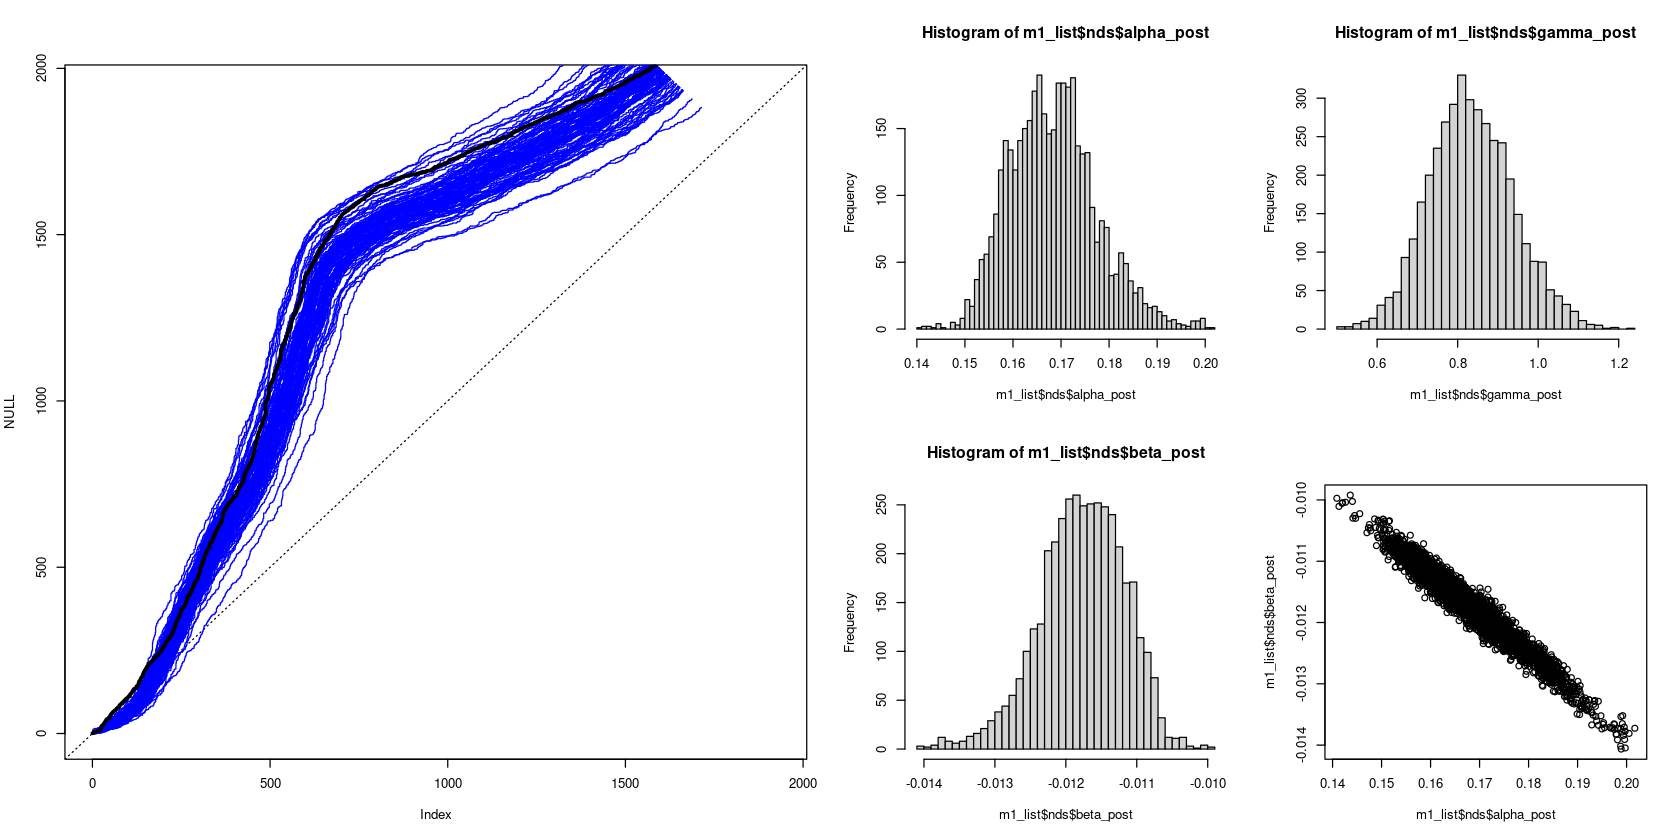

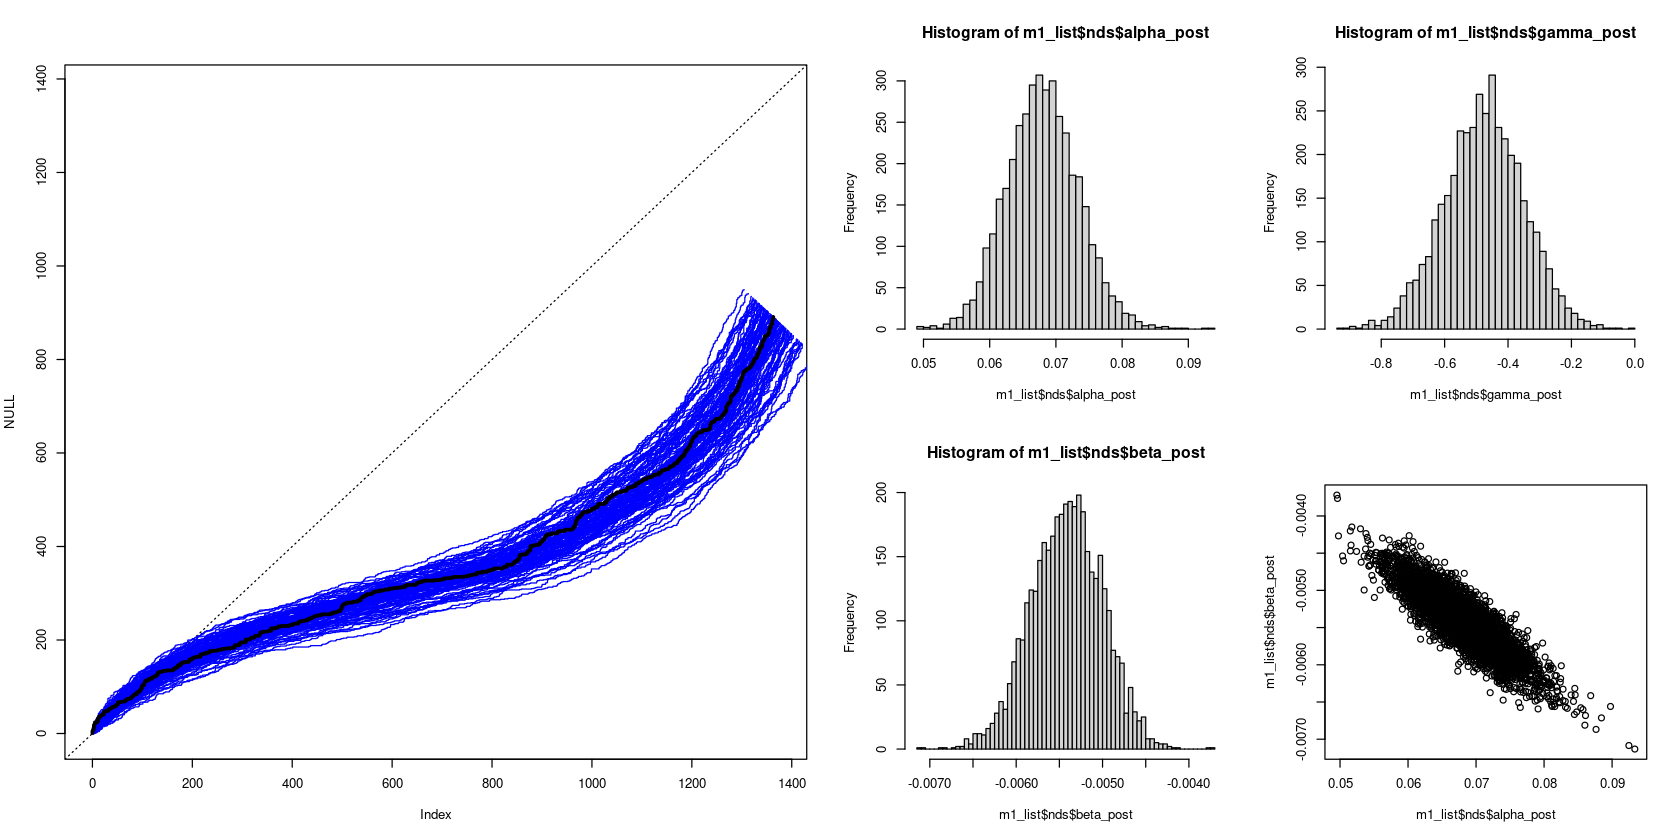

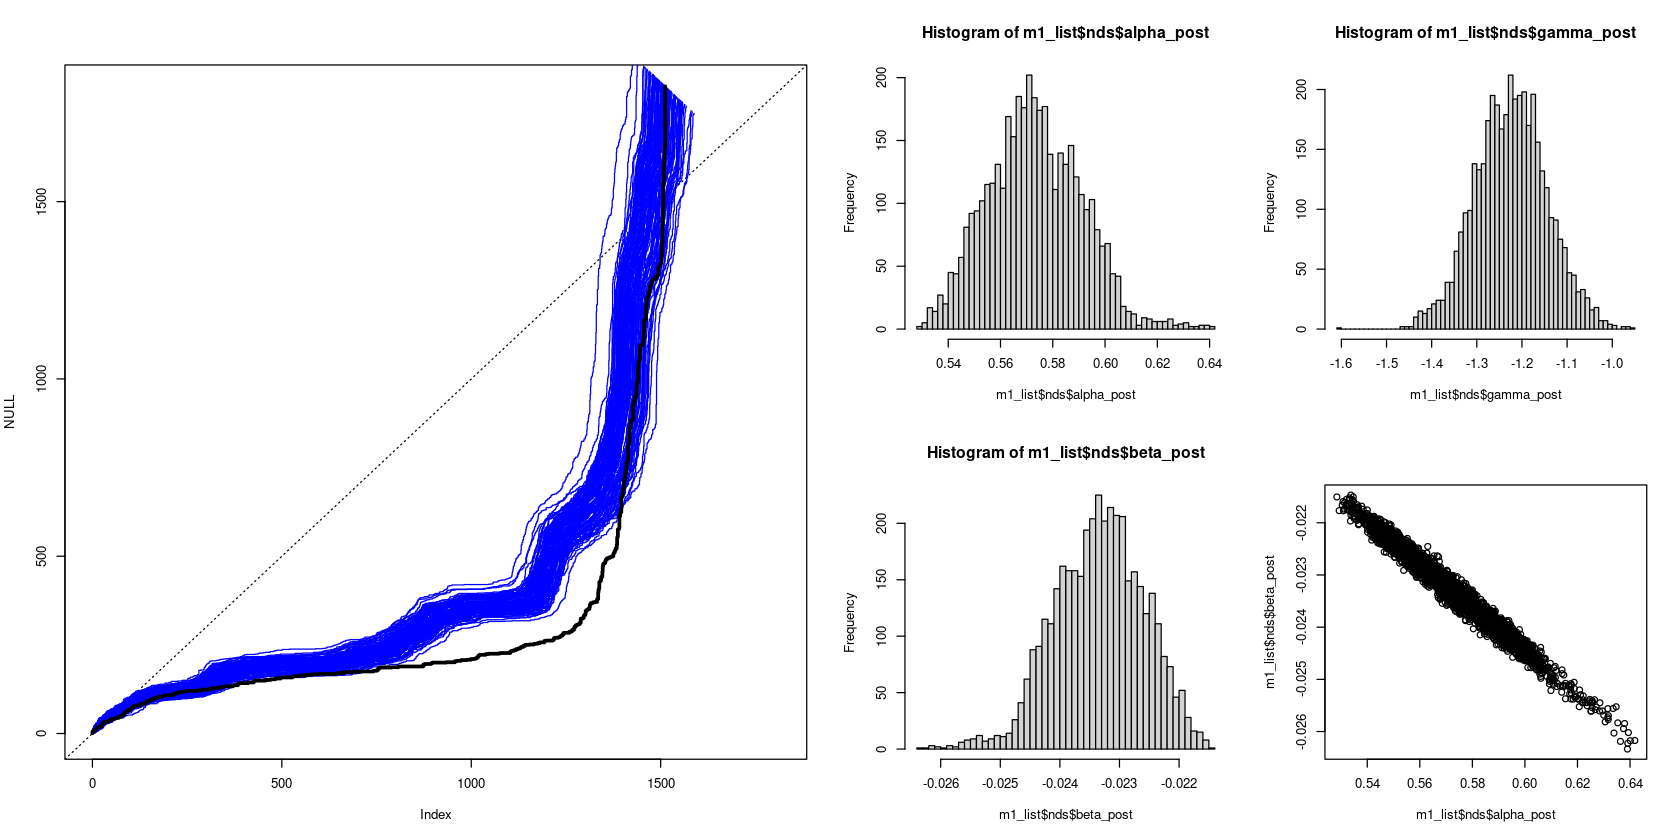

In [327]:
options(repr.plot.height=7,repr.plot.width=14)
plot_model(m1_p004_s59)
plot_model(m1_p054_s12)
plot_model(m1_p510_s15)
plot_model(m1_p510_s16)
plot_model(m1_p510_s152)
plot_model(m1_p530_s119)
plot_model(m1_p530_s144)

In [6]:

infer_model_2 <- function(bird,sess){

#bird = 'p004';sess = 's59'

dts_bird <- read.csv(paste('~/JAPE/ConcurrentData/ResponseAnalysis/responses_',bird,'.csv',sep=''))
dts_session <- subset(dts_bird,session==sess)

choices <- as.numeric(dts_session$lever=='right')
ch <- choices
rewards <- as.numeric(dts_session$reinforced)
n_trials <- length(choices)
    
#r_R <- cumsum(choices==1&rewards==1)
#r_L <- cumsum(choices==0&rewards==1)
#c_R <- cumsum(choices==1)
#c_L <- cumsum(choices==0)

observed <- list('choices','rewards','ch','n_trials')
unobs <- c('alpha_post','beta_post','gamma_post',
           'choices_post')
write('
model{
        
alpha_post~dnorm(0,1)
beta_post~dnorm(0,1)
gamma_post~dnorm(0,1)

w_post <- 10
    for(i in 11:n_trials){
        r_R[i] <- sum(((ch[(i-w_post):i]==1)&&(rewards[(i-w_post):i]==1)))
        r_L[i] <- sum(((ch[(i-w_post):i]==0)&&(rewards[(i-w_post):i]==1)))
        c_R[i] <- sum(ch[(i-w_post):i])
        c_L[i] <- sum(1-ch[(i-w_post):i])
        linear_post[i] <- alpha_post*(r_R[i]-r_L[i])+beta_post*(c_R[i]-c_L[i])+gamma_post
#         linear_post[i] <- beta_post*(c_R[i]-c_L[i])+gamma_post
        theta_post[i] <- 1/(1+exp(-linear_post[i]))
        choices[i]~dbern(theta_post[i])
        choices_post[i]~dbern(theta_post[i])
    }

}
','model2.bug')
library('R2jags')
bayes <- jags(data = observed,
             parameters.to.save = unobs,
             model.file = 'model2.bug',
             n.chains=4,
             n.iter=5000,
             n.burnin=2000,
             n.thin=3)
unlink('model2.bug')
summary(bayes$BUGSoutput$summary)
nds <- bayes$BUGSoutput$sims.list
   return(list(bird=bird,session=sess,choices=choices,rewards=rewards,nds=nds))
}

In [7]:
m2_p004_s59 <- infer_model_2(bird = 'p004',sess = 's59')
save(m2_p004_s59,file='~/JAPE/Modeling/m2_p004_s59_LauGlimcher.RData')

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 3491
   Unobserved stochastic nodes: 3494
   Total graph size: 29857

Initializing model



In [8]:
m2_p510_s152 <- infer_model_2(bird = 'p510',sess = 's152')
save(m2_p510_s152,file='~/JAPE/Modeling/m2_p510_s152_LauGlimcher.RData')

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 3586
   Unobserved stochastic nodes: 3589
   Total graph size: 30872

Initializing model



In [9]:
m2_p530_s144 <- infer_model_2(bird = 'p530',sess = 's144')
save(m2_p530_s144,file='~/JAPE/Modeling/m2_p530_s144_LauGlimcher.RData')

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 3327
   Unobserved stochastic nodes: 3330
   Total graph size: 25109

Initializing model



In [10]:
m2_p530_s119 <- infer_model_2(bird = 'p530',sess = 's119')
save(m2_p530_s119,flie='~/JAPE/Modeling/m2_p530_s119_LauGlimcher.RData')

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2244
   Unobserved stochastic nodes: 2247
   Total graph size: 21720

Initializing model



ERROR: Error in save(m2_p530_s119, flie = "~/JAPE/Modeling/m2_p530_s119_LauGlimcher.RData"): object ‘~/JAPE/Modeling/m2_p530_s119_LauGlimcher.RData’ not found


In [7]:
infer_model_3 <- function(bird,sess){

#bird = 'p004';sess = 's59'

dts_bird <- read.csv(paste('~/JAPE/ConcurrentData/ResponseAnalysis/responses_',bird,'.csv',sep=''))
dts_session <- subset(dts_bird,session==sess)

choices <- as.numeric(dts_session$lever=='right')
ch <- choices
rewards <- as.numeric(dts_session$reinforced)
n_trials <- length(choices)
    
#r_R <- cumsum(choices==1&rewards==1)
#r_L <- cumsum(choices==0&rewards==1)
#c_R <- cumsum(choices==1)
#c_L <- cumsum(choices==0)

observed <- list('choices','rewards','ch','n_trials')
unobs <- c('alpha_post','beta_post','gamma_post',
           'choices_post')
write('
model{
        
alpha_post~dnorm(0,1)
beta_post~dnorm(0,1)
gamma_post~dnorm(0,1)

w_post <- 50
    for(i in 51:n_trials){
        r_R[i] <- sum(((ch[(i-w_post):i]==1)&&(rewards[(i-w_post):i]==1)))
        r_L[i] <- sum(((ch[(i-w_post):i]==0)&&(rewards[(i-w_post):i]==1)))
        c_R[i] <- sum(ch[(i-w_post):i])
        c_L[i] <- sum(1-ch[(i-w_post):i])
        linear_post[i] <- alpha_post*(r_R[i]-r_L[i])+beta_post*(c_R[i]-c_L[i])+gamma_post
#         linear_post[i] <- beta_post*(c_R[i]-c_L[i])+gamma_post
        theta_post[i] <- 1/(1+exp(-linear_post[i]))
        choices[i]~dbern(theta_post[i])
        choices_post[i]~dbern(theta_post[i])
    }

}
','model3.bug')
library('R2jags')
bayes <- jags(data = observed,
             parameters.to.save = unobs,
             model.file = 'model3.bug',
             n.chains=4,
             n.iter=2000,
             n.burnin=1000,
             n.thin=1)
unlink('model3.bug')
summary(bayes$BUGSoutput$summary)
nds <- bayes$BUGSoutput$sims.list
    
    if(length(choices)!=dim(nds$choices_post)[2]){
        subs_len <- length(choices)-dim(nds$choices_post)[2]
        new_chpst <- array(dim=c(dim(nds$choices_post)[1],
                                subs_len))
        for(i in 1:nrow(new_chpst)){
            new_chpst[i,] <- choices[1:subs_len]
        }
        choices_post <- cbind(new_chpst,nds$choices_post)
        nds$choices_post <- choices_post
    }
    
   return(list(bird=bird,session=sess,choices=choices,rewards=rewards,nds=nds))
}

In [3]:
m3_p004_s59 <- infer_model_3(bird = 'p004',sess = 's59')
save(m3_p004_s59,file='~/JAPE/Modeling/m3_p004_s59_LauGlimcher.RData')

Loading required package: rjags

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs


Attaching package: ‘R2jags’


The following object is masked from ‘package:coda’:

    traceplot


module glm loaded



Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 3451
   Unobserved stochastic nodes: 3454
   Total graph size: 49374

Initializing model



In [8]:
m3_p510_s152 <- infer_model_3(bird = 'p510',sess = 's152')
save(m3_p510_s152,file='~/JAPE/Modeling/m3_p510_s152_LauGlimcher.RData')

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 3546
   Unobserved stochastic nodes: 3549
   Total graph size: 51013

Initializing model



In [9]:
m3_p530_s144 <- infer_model_3(bird = 'p530',sess = 's144')
save(m3_p530_s144,file='~/JAPE/Modeling/m3_p530_s144_LauGlimcher.RData')

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 3287
   Unobserved stochastic nodes: 3290
   Total graph size: 45689

Initializing model



In [10]:
m3_p530_s119 <- infer_model_3(bird = 'p530',sess = 's119')
save(m3_p530_s119,file='~/JAPE/Modeling/m3_p530_s119_LauGlimcher.RData')

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 2204
   Unobserved stochastic nodes: 2207
   Total graph size: 33741

Initializing model

